In [16]:
from IPython.display import Image

In [17]:
import math
class AdjLst:
	def __init__(self,v,e):
		self.ver=v
		self.ed=e
		self.head=[ListNode() for i in range(v)]
		#self.time=0
		for i in range(v):
			self.head[i].value=i
	
	def form(self,a,b):
		t=ListNode()
		t.value=b
		t.next=self.head[a].next
		self.head[a].next=t
		t.weight=self.compute_weight(a,b)
		t=ListNode()
		t.value=a
		t.next=self.head[b].next
		self.head[b].next=t
		t.weight=self.compute_weight(a,b)
        
	def compute_weight(self,a,b):
		x1=self.head[a].x
		x2=self.head[b].x
		y1=self.head[a].y
		y2=self.head[b].y
		dist=math.sqrt((x2-x1)**2+(y2-y1)**2)
		return dist

	def printlist(self):
		for k in range(self.ver):
			print("vertex",k,end=" : ")
			t=self.head[k]
			while(t.next):
				print(t.next.value,end=" ")
				t=t.next
			print()

	def UCS(self,s):
		self.head[s].dist=0
		H=BinaryMinHeap()
		for i in range(len(self.head)):
			H.insert(self.head[i])
		while(not H.isEmpty()):
			w=H.extractMin()
			t=w.next
			while(t):
				if self.head[t.value].dist>w.dist+t.weight:
					self.head[t.value].pred=w
					self.head[t.value].dist=w.dist+t.weight
					H.updatePriority(self.head[t.value])
				t=t.next

	def printlst(self,d):
			print("shortest distance : ",self.head[d].dist,end='  ')
			print("path:",end=' ')
			self.getPath(self.head[d])
			print()

	def getPath(self,t):
		if t==None:
			return
		self.getPath(t.pred)
		print([t.x,t.y],end='-->')

class BinaryMinHeap:
	def __init__(self):
		self.E=[]
		self.E.append(-999)
		self.l=len(self.E)
		
	def heapify(self,i):
		if (i<=(self.l-1)/2) and (i>0):
			if(2*i+1<self.l):
				t2=self.E[2*i+1].dist
			t1=self.E[2*i].dist
			if (2*i+1<self.l) and (self.E[i].dist>t2) and (t1>t2):
				t=self.E[2*i+1]
				self.E[2*i+1]=self.E[i]
				self.E[i]=t
				k=i*2+1
			elif(self.E[i].dist>t1):
				t=self.E[2*i]
				self.E[2*i]=self.E[i]
				self.E[i]=t
				k=2*i
			else:
				k=-1
			self.heapify(k)

	def BuildHeap(self):
		for i in range(int((self.l-1)/2),0,-1):
			self.heapify(i)

	def extractMin(self):
		t=self.E[1]
		self.E[1]=self.E[self.l-1]
		self.E[self.l-1]=t
		t=self.E[self.l-1]
		del self.E[self.l-1]
		self.l-=1
		self.heapify(1)
		return t

	def minimum(self):
		return self.E[1]

	def insert(self,k):
		self.l+=1
		self.E.append(k)
		i=int((self.l-1)/2)
		while i>0:
			self.heapify(i)
			i=int(i/2)

	def isEmpty(self):
		if len(self.E)==1:
			return True
		return False

	def updatePriority(self,t):
		for i in range(len(self.E)):
			if(self.E[i]==t):
				break
		self.E[i].dist=t.dist
		k=i
		while(k>0):
			self.heapify(int(k))
			k=k/2

class ListNode:
	def __init__(self):
		self.x=None
		self.y=None
		self.value=None
		self.next=None
		self.col='white'
		self.dist=float('inf')
		self.pred=None
		self.weight=None

In [18]:
class vgraph:
	def __init__(self):
		self.adj={}

	def line_intersection(self,line1,line2):
		xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
		ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) 

		def det(a,b):
			return a[0] * b[1] - a[1] * b[0]

		div = det(xdiff, ydiff)
		if div == 0:
			return False

		d = (det(*line1), det(*line2))
		x = det(d, xdiff) / div
		y = det(d, ydiff) / div
		if x>=min(line1[0][0],line1[1][0]) and x<=max(line1[0][0],line1[1][0]):
			if x>=min(line2[0][0],line2[1][0]) and x<=max(line2[0][0],line2[1][0]):
				if y>=min(line1[0][1],line1[1][1]) and y<=max(line1[0][1],line1[1][1]):
					if y>=min(line2[0][1],line2[1][1]) and y<=max(line2[0][1],line2[1][1]):
						if (x,y)!=line1[0] and (x,y)!=line1[1]:
							return True
		return False

	def findEdges(self,l,S,D):
		self.adj[S]=[]
		self.adj[D]=[]
		for i in range(len(l)):
			for j in l[i]:
				self.adj[j]=[]

		for j in range(len(l)):
			for i in range(len(l[j])):
				if i==len(l[j])-1:
					self.adj[l[j][i]]+=[l[j][0]]
					break

				self.adj[l[j][i]]+=[l[j][i+1]]
				

		edge=[]
		edge+=[(S,D)]
		for i in l:
			for j in i:
				edge+=[(j,S),(j,D)]
                
		j=1
		i=0
		while(i<len(l)):
			if j<len(l):
				for a in l[i]:
					for b in l[j]:
						edge+=[(a,b)]
			j=j+1
			if j>=len(l):
				i=i+1
				j=i+1

		polyedge=[]
		for i in range(len(l)):
			for j in range(len(l[i])-1):
				polyedge+=[(l[i][j],l[i][j+1])]
			polyedge+=[(l[i][j+1],l[i][0])]

		for i in edge:
			flag=False
			for j in polyedge:
				x=self.line_intersection(i,j)
				if x==True:
					flag=True
			if flag==False:
				self.adj[i[0]]+=[i[1]]


In [19]:
# Map 1
polygon=[[],[],[]]
S=(0,0)
G=(5,5)
	
polygon[0]=[[1,1],[2,1],[2,2],[1,2]]
polygon[1]=[[3,3],[4,3],[4,4],[3,4]]
polygon[2]=[[3,1],[4,2],[3,2]]
for i in range(len(polygon)):
	for j in range(len(polygon[i])):
		polygon[i][j]=tuple(polygon[i][j])

In [20]:

def path_finding(polygon,S,G):	
	v=0
	e=0
	VG=vgraph()
	VG.findEdges(polygon,S,G)
	for i in VG.adj:
		v+=1
		for j in VG.adj[i]:
			e+=1
	L=AdjLst(v,e)
	d={}
	c=0
	for i in VG.adj:
		d[i]=c
		c+=1
	
	c=0
		#d=sorted(d,key=lambda x :x[1])
	for i in d:
		L.head[d[i]].x=i[0]
		L.head[d[i]].y=i[1]

	for i in d:
		for j in VG.adj[i]:
			L.form(d[i],d[j])

	for i in range(len(L.head)):
		if(L.head[i].x == S[0] and L.head[i].y == S[1]):
			s=L.head[i].value

	for i in range(len(L.head)):
		if (L.head[i].x == G[0] and L.head[i].y == G[1]):
			d = L.head[i].value
	
	if s<v:
		L.head[s].dist=0
		L.UCS(s)
		L.printlst(d)
	else:
		print("vertex does not exist in given graph")
	

In [21]:
path_finding(polygon,S,G)

shortest distance :  7.3005630797457695  path: [0, 0]-->[1, 2]-->[3, 4]-->[5, 5]-->


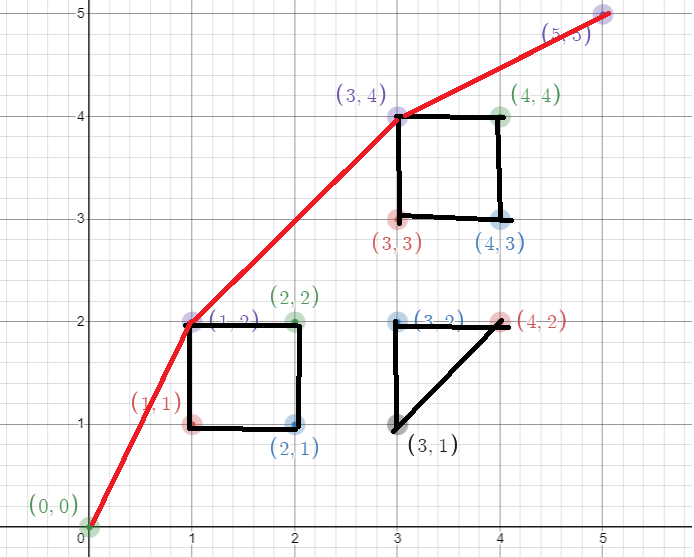

In [22]:
 
Image("Map1.png")

In [23]:
# Map 2
polygon=[[],[],[]]
S=(0,0)
G=(6,6)
	
polygon[0]=[[1,1],[2,1],[2,2],[1,2]]
polygon[1]=[[4,3],[3.5,4],[4,4.5],[5,4],[5,3.5]]
polygon[2]=[[1,4],[1,3],[2,4]]

for i in range(len(polygon)):
	for j in range(len(polygon[i])):
		polygon[i][j]=tuple(polygon[i][j])

In [24]:
path_finding(polygon,S,G)

shortest distance :  8.641192815453117  path: [0, 0]-->[1, 2]-->[4, 4.5]-->[6, 6]-->


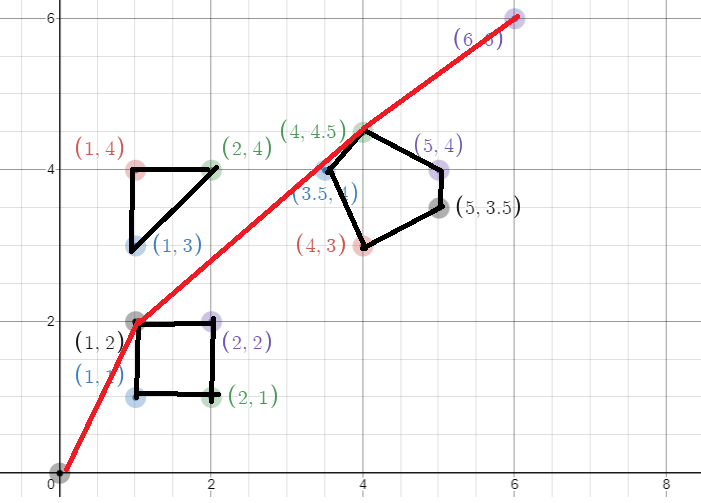

In [25]:
Image("Map2.png")